# Hand gesture recognition - Training model

In [12]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.image_utils import array_to_img, img_to_array, load_img
import keras
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation,Dropout
from keras.layers import LeakyReLU

# Importing the data set and performing data augmentation

In [13]:
train_path = './train'
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range = 4,
                                   width_shift_range=0.15,
                                   height_shift_range = 0.2,
                                   shear_range=0.3,
                                   fill_mode='nearest',
                                   validation_split=0.25)
train_set = train_datagen.flow_from_directory(directory=train_path, class_mode='categorical',
                                                    color_mode = 'grayscale',
                                                    target_size=(64,64), batch_size=128, shuffle=True,
                                                    subset ="training")
validation_set = train_datagen.flow_from_directory(directory=train_path,
                                                 target_size = (64,64),
                                                 batch_size = 64,
                                                 class_mode = 'categorical',
                                                 color_mode = 'grayscale',subset="validation",shuffle=True)

Found 13500 images belonging to 20 classes.
Found 4500 images belonging to 20 classes.


# Defing the model 

In [14]:
def make_model():
    model = Sequential()
    model.add(Conv2D(32,input_shape=(64,64,1),kernel_size=(3,3),strides=(1,1),activation='relu'))
    padding="same"
    model.add(Conv2D(64,kernel_size=(3,3),strides=(2,2),activation='relu'))
    padding="same"
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.15))
    

    model.add(Conv2D(64,kernel_size=(3,3),strides=(2,2),activation='relu'))
    padding="same"
    model.add(Conv2D(128,kernel_size=(3,3),strides=(1,1),activation='relu'))
    padding="same"
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(20,activation='softmax'))
 
    
    model.compile(
          loss = 'categorical_crossentropy',
          optimizer = 'Adam',metrics = ['accuracy']
                )
    return model 

In [15]:
model = make_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 5, 128)         73856     
                                                      

# Training the model

In [16]:
h = model.fit(
      train_set,validation_data = validation_set,
                              epochs=20,steps_per_epoch = 64,validation_steps = 48,
                              callbacks = [
                              keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,mode='auto'),
                              keras.callbacks.ModelCheckpoint('saved/model_{val_loss:.3f}.h5',
                              save_best_only = True,save_weights_only=False,
                              monitor='val_loss')
                              ]
)
model.save('saved_model.h5')

Epoch 1/20
64/64 [==============================] - 229s 4s/step - loss: 2.3071 - accuracy: 0.2780 - val_loss: 1.0150 - val_accuracy: 0.6768
Epoch 2/20
64/64 [==============================] - 98s 2s/step - loss: 0.7009 - accuracy: 0.7638 - val_loss: 0.2834 - val_accuracy: 0.9049
Epoch 3/20
64/64 [==============================] - 53s 827ms/step - loss: 0.2512 - accuracy: 0.9130 - val_loss: 0.1467 - val_accuracy: 0.9482
Epoch 4/20
64/64 [==============================] - 38s 600ms/step - loss: 0.1569 - accuracy: 0.9468 - val_loss: 0.0988 - val_accuracy: 0.9697
Epoch 5/20
64/64 [==============================] - 32s 495ms/step - loss: 0.1076 - accuracy: 0.9616 - val_loss: 0.1073 - val_accuracy: 0.9609
Epoch 6/20
64/64 [==============================] - 32s 493ms/step - loss: 0.0744 - accuracy: 0.9749 - val_loss: 0.0973 - val_accuracy: 0.9652
Epoch 7/20
64/64 [==============================] - 34s 535ms/step - loss: 0.0630 - accuracy: 0.9796 - val_loss: 0.0647 - val_accuracy: 0.9775
Epoc

In [17]:
## Loading the saved model
from keras.models import load_model

model = load_model('saved_model.h5')

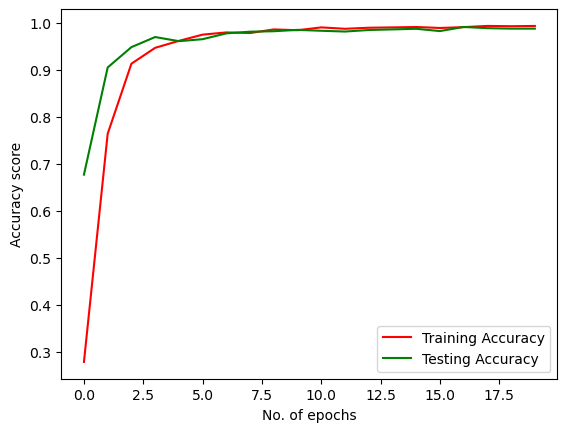

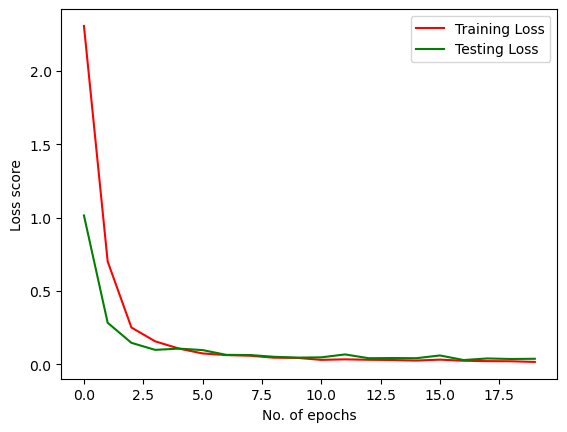

In [18]:
%matplotlib inline
accu= h.history['accuracy']
val_acc=h.history['val_accuracy']
loss=h.history['loss']
val_loss=h.history['val_loss']

epochs=range(len(accu)) #No. of epochs

import matplotlib.pyplot as plt
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy score')
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.xlabel('No. of epochs')
plt.ylabel('Loss score')
plt.legend()
plt.show()

